In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)


Using TensorFlow backend.


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
y_train = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [6]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 13s 870us/step - loss: 0.6932 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5043
Epoch 2/5
15000/15000 [==============================] - 10s 670us/step - loss: 0.6930 - acc: 0.5048 - val_loss: 0.6936 - val_acc: 0.4987
Epoch 3/5
15000/15000 [==============================] - 5s 308us/step - loss: 0.6915 - acc: 0.5377 - val_loss: 0.6937 - val_acc: 0.5035
Epoch 4/5
15000/15000 [==============================] - 4s 270us/step - loss: 0.6871 - acc: 0.5563 - val_loss: 0.6939 - val_acc: 0.5011
Epoch 5/5
15000/15000 [==============================] - 5s 306us/step - loss: 0.6790 - acc: 0.5855 - val_loss: 0.6970 - val_acc: 0.4948


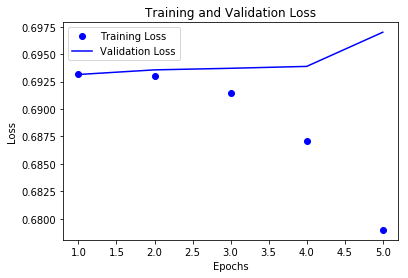

In [10]:
# import matplotlib.pyplot as plt

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.lagend()

# plt.show()

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [1]:
print("navaid")

navaid
